## xcube CMEMS Data Store 

*Please checkout the general introduction to xcube data stores in the Jupyter Notebook Getting Started before jumping into this notebook :)*

This notebook provides a walk-through demonstrating how to use xcube and the xcube-cmems plugin to read and explore data from the CMEMS API.

In order to run this notebook you need to install the xcube_cmems plugin. You may do so by executing the following line in your terminal:

``` $  conda install -c conda-forge xcube-cmems ```

*Or you can install the xcube_cmems plugin from sources by following the instructions on https://github.com/dcs4cop/xcube-cmems.*

In [1]:
import os
# mandatory imports
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Utilities for notebook visualization
from IPython.display import JSON

Check whether the `cmems` store is among the available stores, if not please follow the installation information from the top of this notebook. 

In [2]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

In [3]:
get_data_store_params_schema('cmems')

set `CMEMS_USER` and `CMEMS_PASSWORD` as environment variables
If you do not have cmems user yet, you can register for an [account](https://resources.marine.copernicus.eu/registration-form)

In [14]:
# os.environ["CMEMS_USER"] =  ""
# os.environ["CMEMS_PASSWORD"] = ""

In [15]:
datastore_params = {'cmems_username': os.getenv('CMEMS_USER'), 'cmems_password': os.getenv('CMEMS_PASSWORD')}

In [16]:
store = new_data_store('cmems', **datastore_params)
store

Get all the data ids in `cmems` datastore

In [ ]:
JSON(store.list_data_ids())

<IPython.core.display.JSON object>

Get more info about a specific dataset.

In [18]:
store.describe_data('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i')

Which parameters must be passsed or are available to open the dataset? 

In [19]:
store.get_open_data_params_schema('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i')

The dataset can be opened by giving variables_names, time_range and bbox as params, but none of them are mandatory.

In [20]:
dataset = store.open_data('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i', 
                          variable_names=['VHM0'], 
                          bbox=[9, 53, 20, 62], 
                          time_range=('2022-01-01','2022-01-05'))
dataset

<xarray.Dataset>
Dimensions:    (time: 40, latitude: 109, longitude: 133)
Coordinates:
  * latitude   (latitude) float64 53.0 53.08 53.17 53.25 ... 61.83 61.92 62.0
  * longitude  (longitude) float64 9.0 9.083 9.167 9.25 ... 19.83 19.92 20.0
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-01-05T21:00:00
Data variables:
    VHM0       (time, latitude, longitude) float32 dask.array<chunksize=(1, 109, 133), meta=np.ndarray>
Attributes: (12/22)
    Conventions:           CF-1.6
    time_coverage_start:   20230219-03:00:00
    time_coverage_end:     20230220-00:00:00
    date_created:          20230210-07:42:00
    product_type:          forecast
    product:               GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    ...                    ...
    geospatial_lon_step:   0.08332825
    geospatial_lon_units:  degree
    geospatial_lat_min:    -80.0
    geospatial_lat_max:    90.0
    geospatial_lat_step:   0.08333588
    geospatial_lat_units:  degree

In [11]:
dataset.VHM0

<xarray.DataArray 'VHM0' (time: 120, lat: 540, lon: 396)>
dask.array<getitem, shape=(120, 540, 396), dtype=float32, chunksize=(4, 481, 396), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 53.01 53.02 53.04 53.06 ... 61.94 61.96 61.97 61.99
  * lon      (lon) float32 9.014 9.042 9.069 9.097 ... 19.9 19.93 19.96 19.99
  * time     (time) datetime64[ns] 2022-01-01 ... 2022-01-05T23:00:00
Attributes:
    long_name:      Spectral significant wave height (Hm0)
    standard_name:  sea_surface_wave_significant_height
    units:          m
    valid_min:      0.0
    valid_max:      20.0

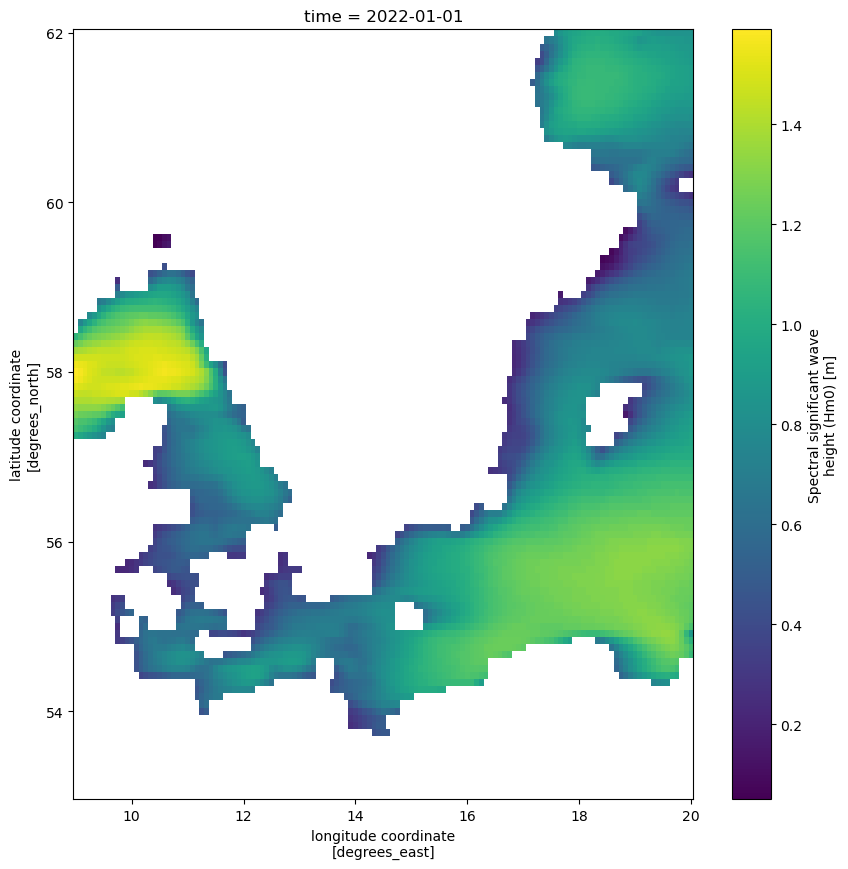

In [21]:
dataset.VHM0[0].plot(figsize=(10, 10))